In [1]:
import math
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

In [2]:
# 1. 데이터 가져오기
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초, 6개  컬럼 생성하기
def trans_datetime(dataframe):
    dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
    dataframe['year'] = dataframe['datetime'].dt.year
    dataframe['month'] = dataframe['datetime'].dt.month
    dataframe['day'] = dataframe['datetime'].dt.day
    dataframe['hour'] = dataframe['datetime'].dt.hour
    dataframe['minute'] = dataframe['datetime'].dt.minute
    dataframe['second'] = dataframe['datetime'].dt.second
    dataframe.drop(columns="datetime",axis=1,inplace=True)
    return

trans_datetime(train)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


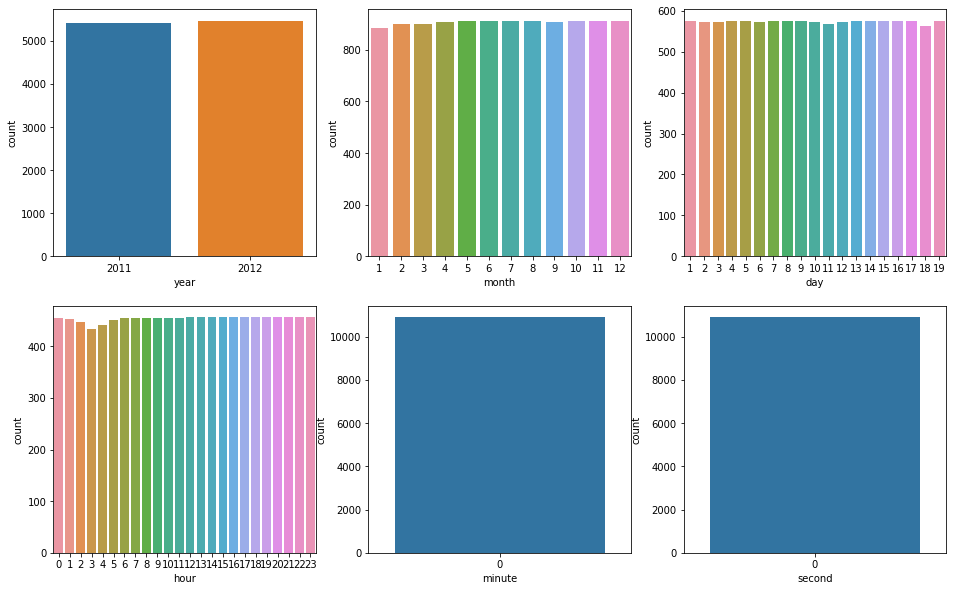

In [5]:
# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기
fig, ax1 = plt.subplots(figsize=(16, 10), ncols=3, nrows=2)
time_feat_list = ['year', 'month', 'day', 'hour', 'minute', 'second']
for i, time_feat in enumerate(time_feat_list):
    row = int(i/3)
    col = i%3
    sns.countplot(x=time_feat, data=train, ax=ax1[row][col])

<function matplotlib.pyplot.show(close=None, block=None)>

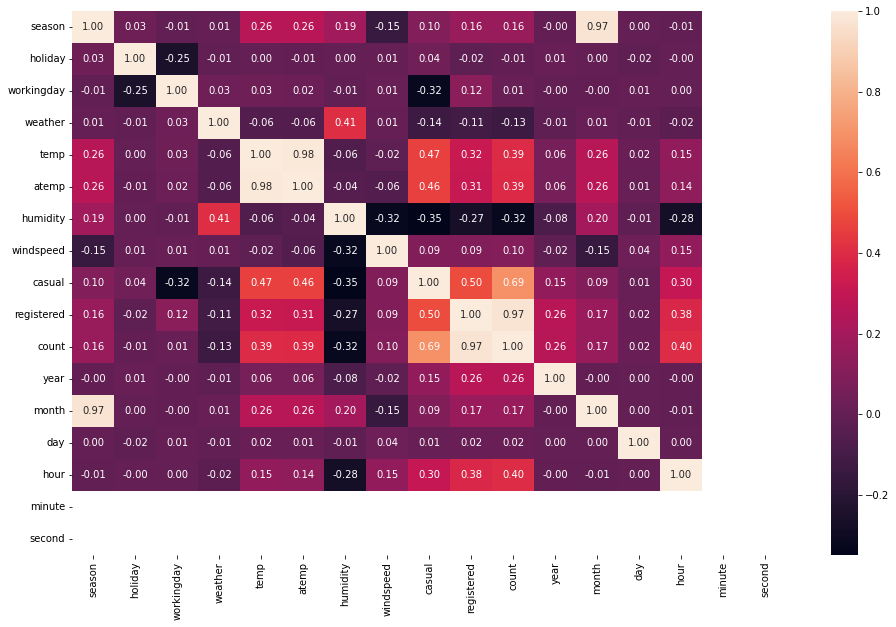

In [6]:
# 4. X, y 컬럼 선택 및 train/test 데이터 분리
corr = train.corr()
plt.figure(figsize=(16,10))

sns.heatmap(corr, annot=True, fmt='.2f')

plt.show

In [7]:
from sklearn.model_selection import train_test_split

label = train['count']
drop_feat = ['season', 'atemp', 'casual', 'registered', 'count', 'minute', 'second']
for i in drop_feat:
    train.drop(columns=i,axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=0)

In [8]:
# 5. LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression

def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

def RMSE(a, b):
    rmse = math.sqrt(MSE(a,b))
    return rmse

def linear_learn_predict_mse_rmse(x_train, x_test, y_train, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    print('MSE is :', mse)
    print('RMSE is :', rmse)
    return y_pred

In [9]:
# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
y_pred = linear_learn_predict_mse_rmse(X_train, X_test, y_train, y_test)

MSE is : 20236.80331335293
RMSE is : 142.2561187202608


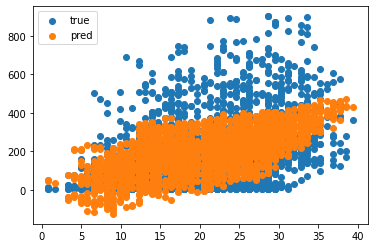

In [10]:
# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], y_pred, label="pred")
plt.legend()
plt.show()

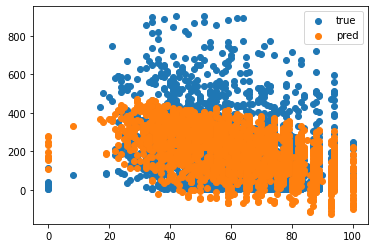

In [11]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], y_pred, label="pred")
plt.legend()
plt.show()